<a href="https://colab.research.google.com/github/ruu1004/Major-Project-Cost-ai-image-generation-with-cloud-cost-optimization/blob/main/COST_WITH_CLOUD_SERVICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Text Prompt               100000 non-null  object 
 1   GPU Time (hrs)            100000 non-null  float64
 2   GPU Cost (USD)            100000 non-null  float64
 3   Storage Size (MB)         100000 non-null  float64
 4   Storage Cost (USD)        100000 non-null  float64
 5   API Calls                 100000 non-null  int64  
 6   API Cost (USD)            100000 non-null  float64
 7   Data Transfer Cost (USD)  100000 non-null  float64
 8   Resolution                100000 non-null  object 
 9   Format                    100000 non-null  object 
 10  File Size (MB)            100000 non-null  float64
 11  Cloud Service             100000 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 9.2+ MB
Dataset Info:
 None
Missing Values:
 Text Pr

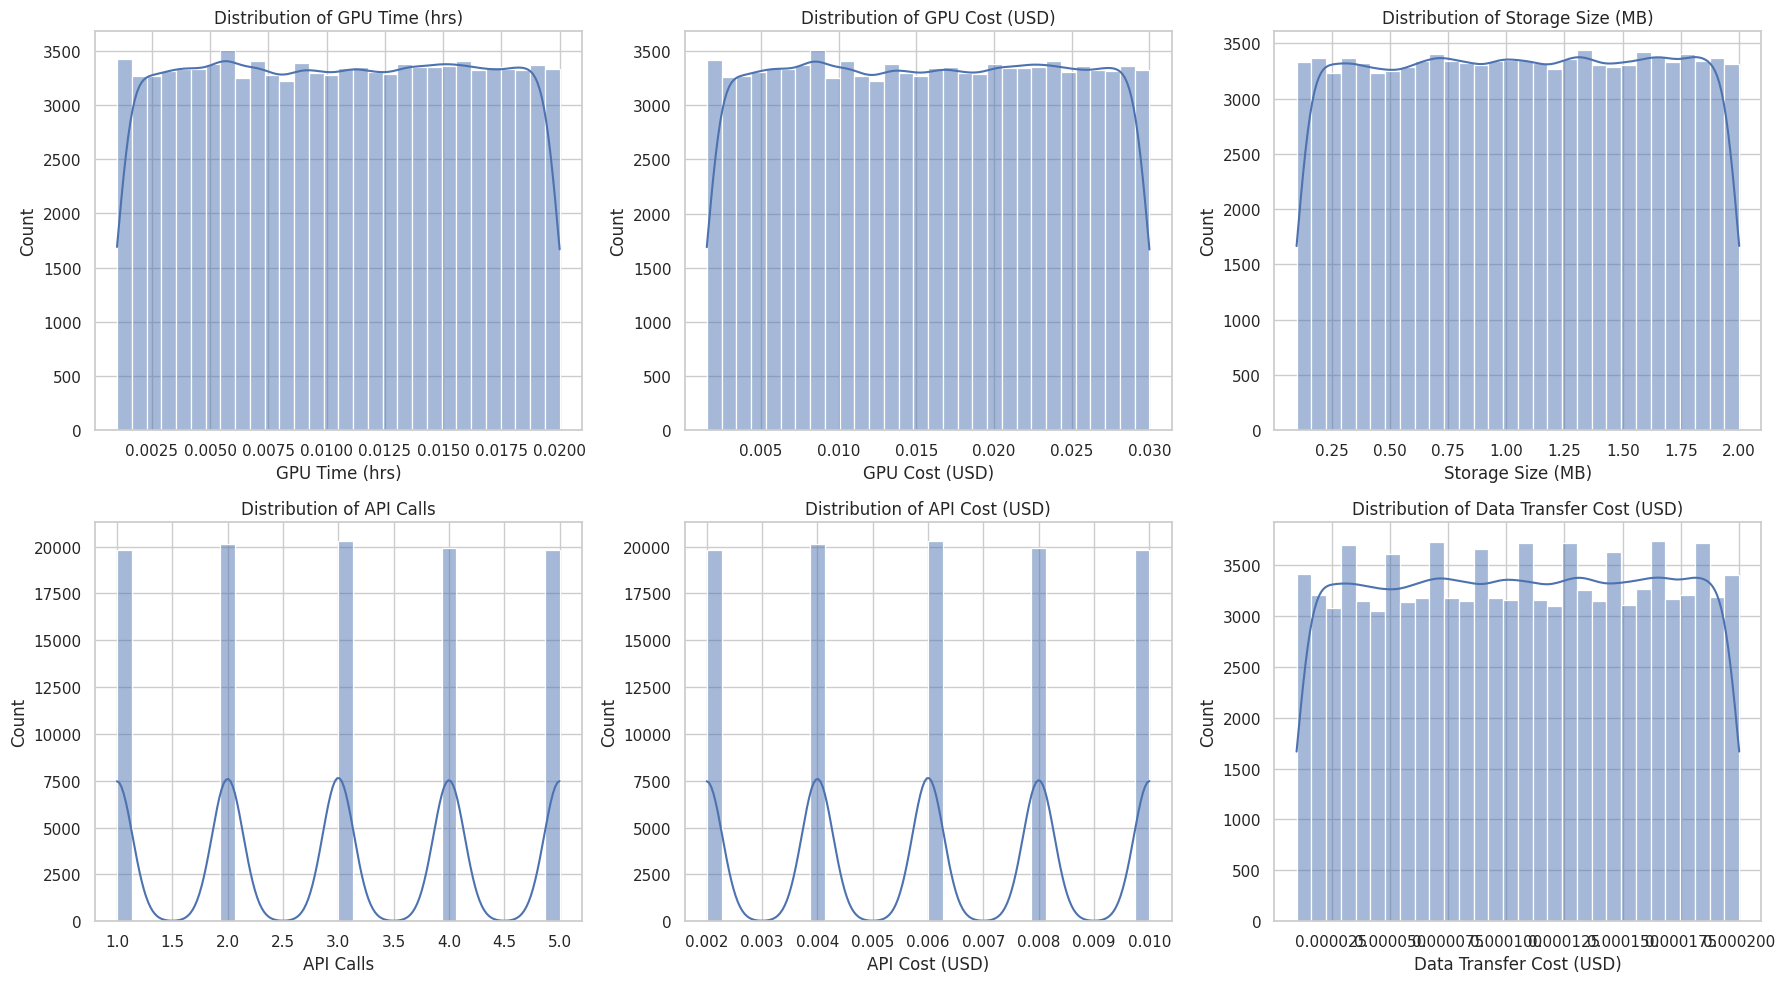

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
file_path = "/content/text_prompts_costs-Dataset_with_Cloud_Service.csv"
df = pd.read_csv(file_path)
# Step 1: Display basic info and check for missing values
print("Dataset Info:\n", df.info())
print("Missing Values:\n", df.isnull().sum())
# Step 2: Display basic statistics
print("Basic Statistics:\n", df.describe())
# Step 3: Plot distributions of key numerical columns
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
columns_to_plot = ["GPU Time (hrs)", "GPU Cost (USD)", "Storage Size (MB)",
                   "API Calls", "API Cost (USD)", "Data Transfer Cost (USD)"]

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

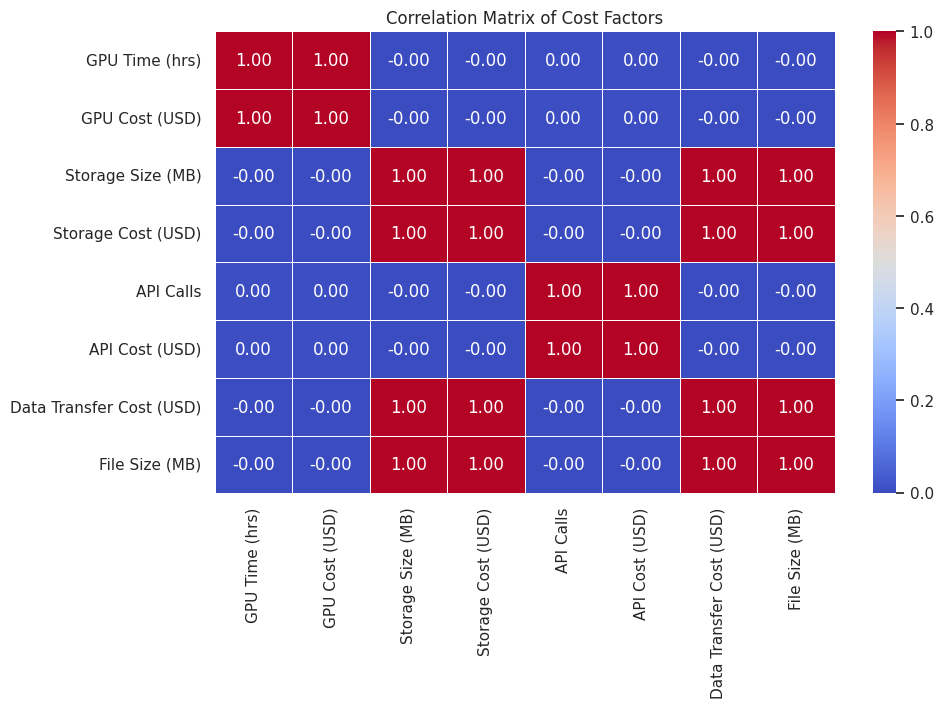

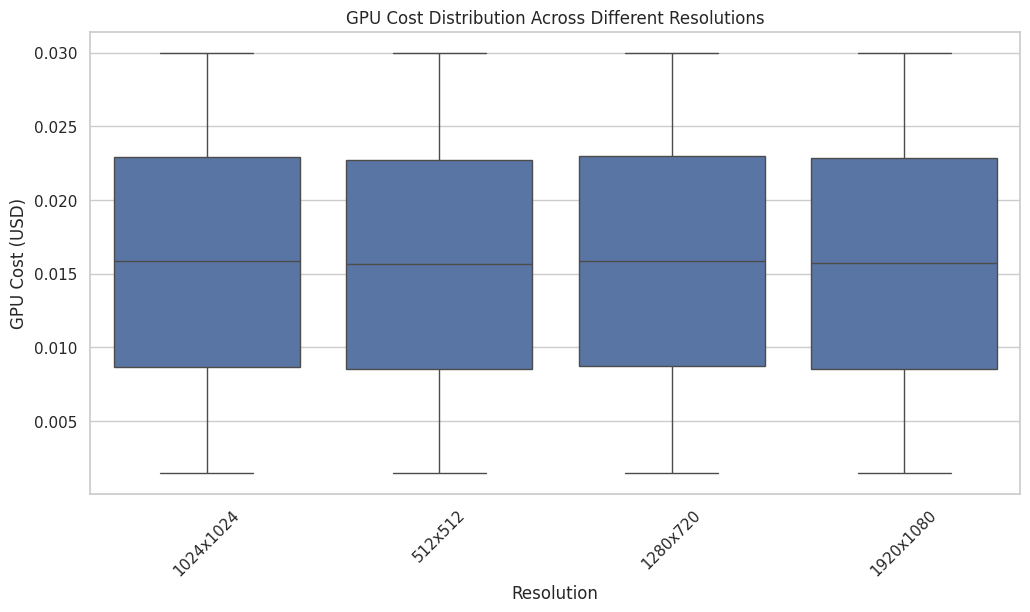

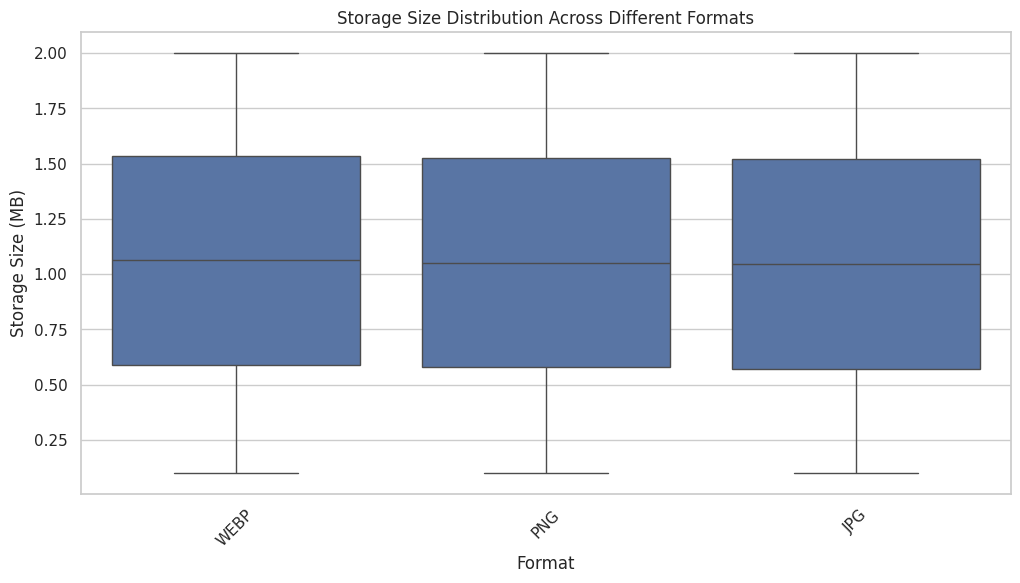

Optimal Average Costs by Resolution:
             GPU Cost (USD)  Storage Cost (USD)  API Cost (USD)
Resolution                                                    
1024x1024         0.015805            0.000021        0.005985
1280x720          0.015843            0.000021        0.005996
1920x1080         0.015731            0.000021        0.005988
512x512           0.015663            0.000021        0.006019


In [5]:
# Step 4: Correlation Heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Cost Factors")
plt.show()
# Step 5: Boxplots for GPU Cost by Resolution & Storage Size by Format
plt.figure(figsize=(12, 6))
sns.boxplot(x="Resolution", y="GPU Cost (USD)", data=df)
plt.xticks(rotation=45)
plt.title("GPU Cost Distribution Across Different Resolutions")
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x="Format", y="Storage Size (MB)", data=df)
plt.xticks(rotation=45)
plt.title("Storage Size Distribution Across Different Formats")
plt.show()
# Step 6: Cost Optimization - Find cheapest options per resolution
optimal_costs = df.groupby("Resolution")[["GPU Cost (USD)", "Storage Cost (USD)", "API Cost (USD)"]].mean()
print("Optimal Average Costs by Resolution:\n", optimal_costs)

Cost Summary by Cloud Provider:
               GPU Cost (USD)  Storage Cost (USD)  API Cost (USD)  \
Cloud Service                                                       
AWS                528.398614            0.703307         200.684   
Azure              525.278303            0.702970         199.456   
GCP                522.370611            0.698951         199.570   

               Data Transfer Cost (USD)  Total Cost (USD)  
Cloud Service                                              
AWS                            3.516575        733.302496  
Azure                          3.515175        728.952448  
GCP                            3.494924        726.134486  


<ipython-input-7-c6268fecb415>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cost_summary.index, y=cost_summary["Total Cost (USD)"], palette="viridis")


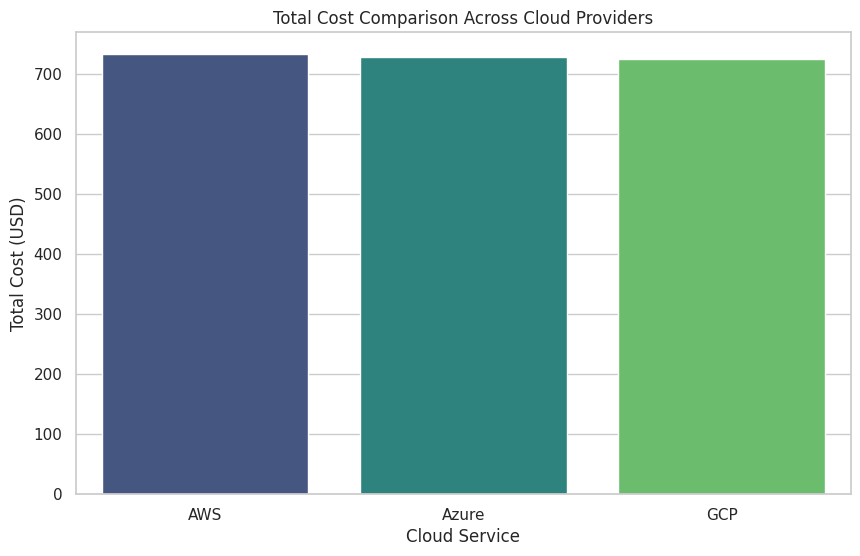

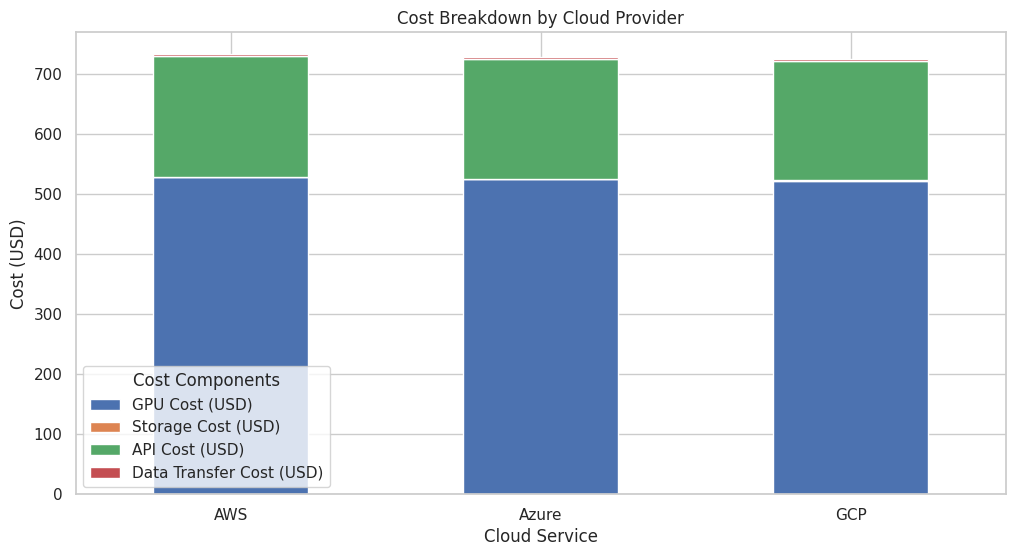

<ipython-input-7-c6268fecb415>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cloud Service"], y=df[attribute], palette="coolwarm")


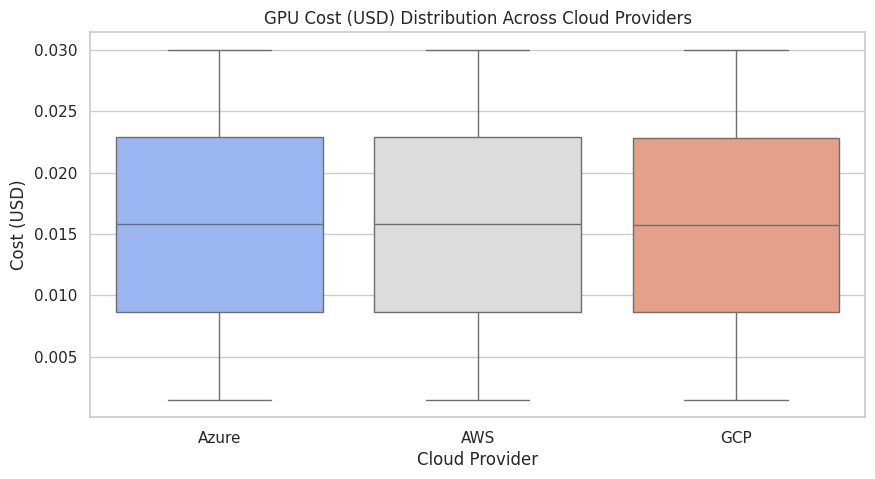

<ipython-input-7-c6268fecb415>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cloud Service"], y=df[attribute], palette="coolwarm")


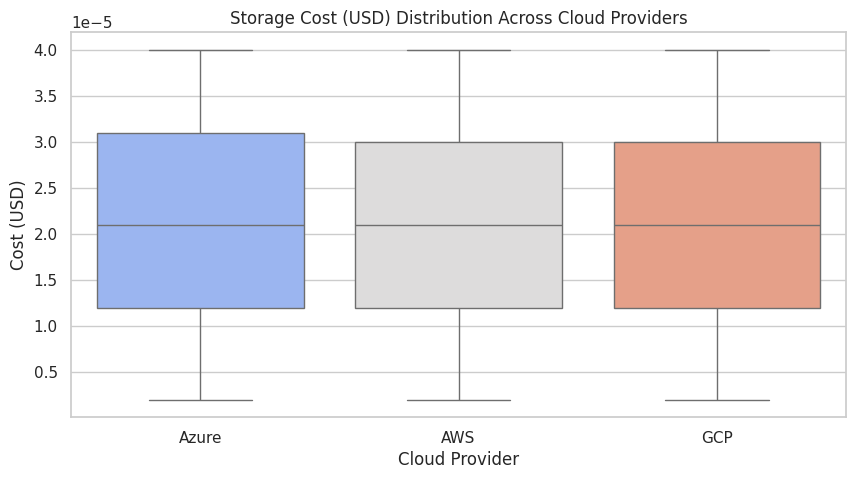

<ipython-input-7-c6268fecb415>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cloud Service"], y=df[attribute], palette="coolwarm")


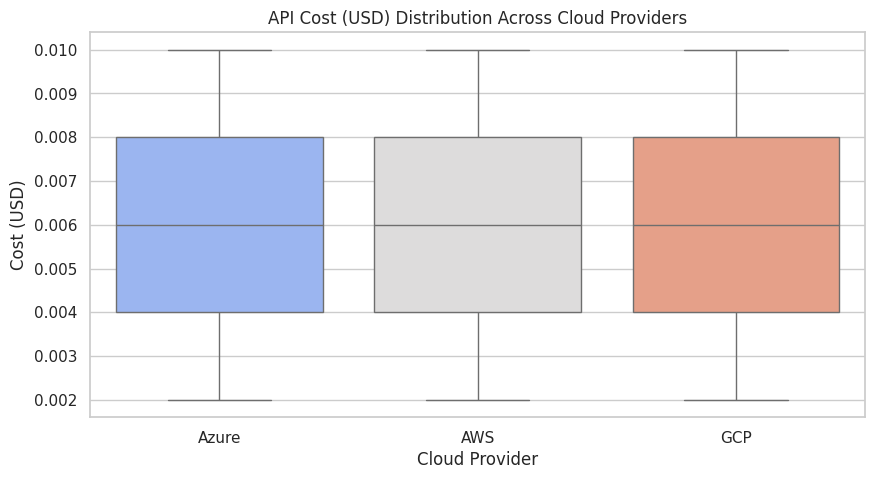

<ipython-input-7-c6268fecb415>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cloud Service"], y=df[attribute], palette="coolwarm")


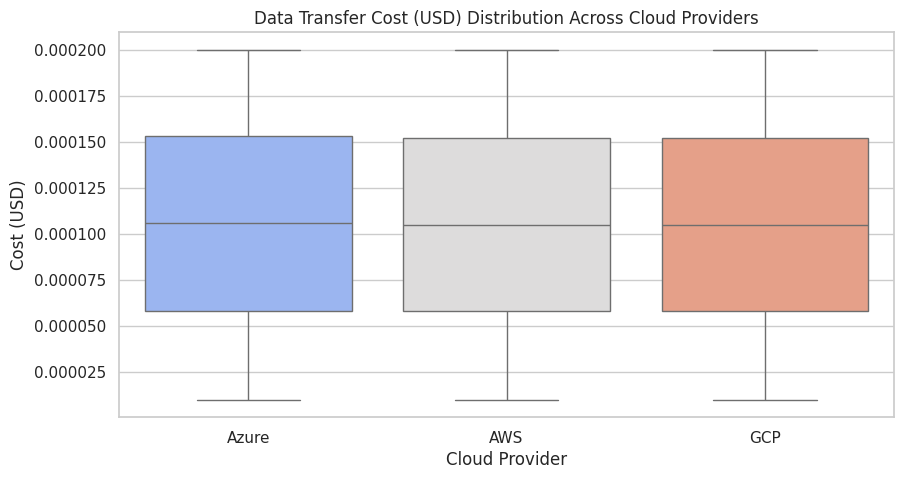

Most cost-efficient provider: GCP
Optimization Strategies:
- General: Consider reducing storage costs and optimizing data transfer by using compression.
- AWS: Leverage spot instances and reserved instances for cost reduction.
- Azure: Use Azure Hybrid Benefit and storage tiering strategies.
- GCP: Utilize sustained use discounts and preemptible VMs.


In [7]:
def compute_cost_summary(df):
    df["Total Cost (USD)"] = df[["GPU Cost (USD)", "Storage Cost (USD)", "API Cost (USD)", "Data Transfer Cost (USD)"]].sum(axis=1)
    cost_summary = df.groupby("Cloud Service")[
        ["GPU Cost (USD)", "Storage Cost (USD)", "API Cost (USD)", "Data Transfer Cost (USD)", "Total Cost (USD)"]
    ].sum()
    return cost_summary

def plot_cost_comparison(cost_summary):
    plt.figure(figsize=(10,6))
    sns.barplot(x=cost_summary.index, y=cost_summary["Total Cost (USD)"], palette="viridis")
    plt.title("Total Cost Comparison Across Cloud Providers")
    plt.ylabel("Total Cost (USD)")
    plt.xticks(rotation=0)
    plt.show()

def plot_cost_breakdown(cost_summary):
    cost_summary.drop(columns=["Total Cost (USD)"]).plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title("Cost Breakdown by Cloud Provider")
    plt.ylabel("Cost (USD)")
    plt.xticks(rotation=0)
    plt.legend(title="Cost Components")
    plt.show()

def plot_individual_costs(df):
    cost_attributes = ["GPU Cost (USD)", "Storage Cost (USD)", "API Cost (USD)", "Data Transfer Cost (USD)"]
    for attribute in cost_attributes:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=df["Cloud Service"], y=df[attribute], palette="coolwarm")
        plt.title(f"{attribute} Distribution Across Cloud Providers")
        plt.ylabel("Cost (USD)")
        plt.xlabel("Cloud Provider")
        plt.show()

def optimize_strategy(df):
    df["Cost per API Call"] = df["Total Cost (USD)"] / df["API Calls"].replace(0, 1)
    best_provider = df.groupby("Cloud Service")["Cost per API Call"].mean().idxmin()
    optimization_tips = {
        "General": "Consider reducing storage costs and optimizing data transfer by using compression.",
        "AWS": "Leverage spot instances and reserved instances for cost reduction.",
        "Azure": "Use Azure Hybrid Benefit and storage tiering strategies.",
        "GCP": "Utilize sustained use discounts and preemptible VMs."
    }
    return best_provider, optimization_tips

if __name__ == "__main__":
    file_path = "text_prompts_costs-Dataset_with_Cloud_Service.csv"
    df = load_data(file_path)

    cost_summary = compute_cost_summary(df)
    print("Cost Summary by Cloud Provider:")
    print(cost_summary)

    plot_cost_comparison(cost_summary)
    plot_cost_breakdown(cost_summary)
    plot_individual_costs(df)

    best_provider, tips = optimize_strategy(df)
    print(f"Most cost-efficient provider: {best_provider}")
    print("Optimization Strategies:")
    for key, value in tips.items():
        print(f"- {key}: {value}")
